## EDA with Seaborn

In [1]:
# This exercise is an attempt to do data visulization with Seaborn
# We will explore first the Univariate Analysis 
# Later we will do bi-variate analysis

In [80]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats
# Setting theme for seaborn
sns.set_theme(style="darkgrid")
from matplotlib.pyplot import figure, show

In [3]:
# Wine data
wine = pd.read_csv("winemag-data_first150k.csv",index_col=False)

In [4]:
# Columns from Wine Data
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
# Remove the columns that is not needed
wine.drop(columns={'Unnamed: 0'}, inplace=True)

In [6]:
# Looking at the data
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
# Summary stats
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [8]:
# Let's look at the info
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None


In [9]:
# Let's look at dimension 
print("Number of rows : " , wine.shape[0])
print("Number of columns :" , wine.shape[1])

Number of rows :  150930
Number of columns : 10


In [10]:
# We can also count the number of NaN for the below.

(wine.isna().sum()/len(wine))*100

country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
region_2       59.615053
variety         0.000000
winery          0.000000
dtype: float64

In [11]:
# Looking at the unique values for below columns
# region_1, region_2, country, variety, winery, and points

In [12]:
wine['country'].nunique()

48

In [13]:
# Identify the number of unique values against the total length 
# Remove anything that has above 10 %
list_of_columns = ['country','points','region_1','region_2','designation','winery']

for i in list_of_columns:
    print(i,(wine[i].nunique()/len(wine))*100)

country 0.031802822500496916
points 0.013913734843967402
region_1 0.8189226793877957
region_2 0.011926058437686345
designation 20.28821307891075
winery 9.812495859007486


In [14]:
# Dropping "designation" since it has 20 % unique values
wine.drop(columns={'designation'},inplace=True)

In [15]:
# Replacing NaN country with mode
wine['country'] = wine['country'].fillna(wine['country'].mode()[0])

In [16]:
# We can remove duplciates based on all values

wine.drop_duplicates(inplace=True)

### Done with EDA ... 
### Some Feature Engineering

In [17]:
wine.head()

,country,description,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [18]:
# We will explore the relationship between price and points first
# Price will be our target variable and points as feature
wine_1 = wine[['price','points']]

In [22]:
# We have lots of blank price in the dataframe
# we will remove the price as blanks from the analysis

In [25]:
wine_1.dropna(subset=['price'],inplace=True)

<ipython-input-25-8dbf524352f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_1.dropna(subset=['price'],inplace=True)


In [27]:
from sklearn import preprocessing

In [29]:
wine_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89131 entries, 0 to 149639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   89131 non-null  float64
 1   points  89131 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


<h2><p><center> <font color="blue">Linear Regression </font></center> <p> </h2>
<p><center> 
    
The Simplest and probably oldest form of regression. This is a part of Supervised Algorithm to 
find relationship between a "numeric" dependent / target variable and (in this case) a "numeric"                   independent / feature variable.  

There are a quite lot of assumptions made in Linear Regression but before going there we will see how it looks in the mathematical form.
    
    
    
</center><p>

<font color='magenta'><h3>$$ Y = \beta_0 + \beta_1*x $$</h3></font>

<center><b>Y : Dependent / Target / Label</b></center><br>
<b>$${\beta_0}:  Intercept $$</b><br>
$${\beta_1}:  Slope$$<br>
<center><b>x : Inependent /Feature Variable</center></b>

Before diving deeper. Let's look at the <b> Scatterplot </b> between Price and Points

<ipython-input-65-526bcb0da562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_1["points"] = pd.to_numeric(wine_1["points"], downcast='float')


<AxesSubplot:xlabel='price', ylabel='points'>

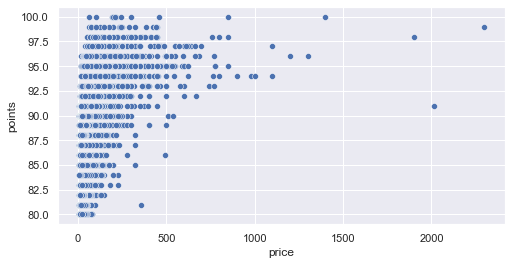

In [65]:
wine_1["points"] = pd.to_numeric(wine_1["points"], downcast='float')

plt.figure(figsize=(8,4))
sns.scatterplot(data=wine_1, x="price",y="points")

<p>Looking at the scatterplot it seems like there are few wines where following characteristics are happening</p>

<ol>
    <li> Lower Points But Higher Price </li>
    <li> Higher Points But Lower Value </li>
</ol>




<Figure size 864x720 with 0 Axes>

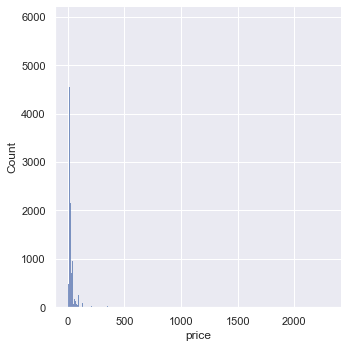

In [72]:
# Let's look at the distribution of each variable
# First we will start with "Price"
plt.figure(figsize=(12,10))
sns.displot(data=wine_1,x=wine_1['price'])
plt.show()

In [79]:
# The above plot seems highly skewed 
# We can also check the skewness of data with scipy.stats models

scipy.stats.skew(wine_1['price'])

12.869948267703828

<p> Skew Value of 0 means a perfectly non skewed or Gaussian distribution while value above 0 means there is a lot of left skewness </p>

<p><h3> We can reduce the skewness by following ways </h3></p>
<ul>
    <li> Mean Normalization </li>
    <li> Log Transformation </li>
    <li> Min Max Normaliztion </li>
    <li> Z Score Normalization </li>
</ul>

<p> We will also look at the <b> Correlation Coefficeint </b> to learn more about the linear relationship </p>
<p> For this example we will look at <b> Pearson's Correlation Coefficient</b>. Coefficient of -1 and +1 signify strict linear relationship, however any value between -1 and +1 may mean strength of relationship is weak. 
    Coefficient of 0 means no linear relationship</p>
<p> It is important to note that Correlation Coefficinet provides both <b>Strength</b> and <b>Direction</b> of relationship. +1 means with increase in x , y also increases, while -1 means with increase in x , y decreases and vice versa </p>

<h3><p><font color="blue">Correlation provides Direction and Strength, while Covariance provides only Direction </font><p></h3>